# EDA

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy





import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature

## Loading Data

In [2]:
# Dataset 1
# using dataset from https://www.kaggle.com/devvret/brazil-real-estate-listings
data_br = pd.read_csv('../datasets/properati_br_2016_11_01_properties_rent-Copy1.csv')

In [3]:
# Dataset 2
# using data for Sāo Paulo from https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

data_sp = pd.read_csv('../datasets/sao-paulo-properties-april-2019-Copy1.csv')

## Data Cleaning

### Looking at shape of DataFrames

In [4]:
data_br.shape

(97353, 25)

In [5]:
data_sp.shape

(13640, 16)

### Checking Null Values

In [6]:
data_br.isnull().sum()

created_on                        0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
geonames_id                   97350
lat_lon                       51323
lat                           51323
lon                           51323
price                          5019
currency                       5020
price_aprox_local_currency     5019
price_aprox_usd                5019
surface_total_in_m2           81505
surface_covered_in_m2         21769
price_usd_per_m2              26938
price_per_m2                  26938
floor                         92068
rooms                         38590
expenses                      65580
properati_url                     0
description                       0
title                             0
image_thumbnail                5134
location                      51323
dtype: int64

In [7]:
data_sp.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

> Brazil dataset has many null values, whereas the Sao Paulo dataset has no null values. This is not a big concern as most of the columns with null values will not be used due to using only the columns found in both datasets.

> Our goal is to identify where informal settlements are. For this reason we will be using only the data where the longitude and latitude is not null. 

### Creating a DataFrame with Geo-Spatial Data

In [8]:
geo_data_br = data_br[data_br['lat_lon'].isnull() != 1]

In [9]:
geo_data_sp = data_sp[data_sp['Latitude'].isnull() != 1]

## Investigating Assumed Key Features

> When looking at real estate data we made the assumption that some features would be more telling than others. These features are further investigated to make sure there are no outliers or wrong inputs. The features that will be investigate are 'Price' and 'Property Type'.

#### Sao Paulo Data

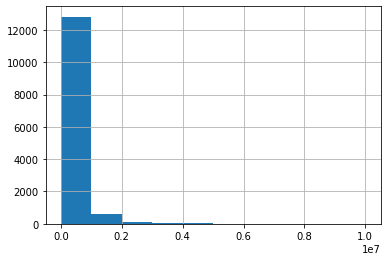

In [10]:
geo_data_sp['Price'].hist()

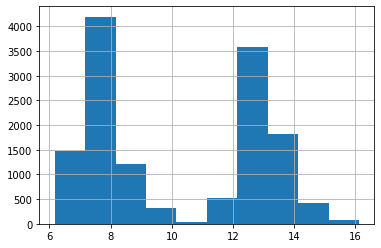

In [11]:
np.log(geo_data_sp['Price']).hist()

> Histogram suggests there are two different types of prices. Further investigation in needed.

In [12]:
geo_data_sp.groupby('Negotiation Type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Negotiation Type,,,,,,,,
rent,7228.0,3077.669065,3522.830284,480.0,1350.0,2000.0,3300.0,50000.0
sale,6412.0,608624.140050,740451.549192,42000.0,250000.0,380000.0,679000.0,10000000.0


In [66]:
geo_data_sp['Negotiation Type'].value_counts(normalize= True)

rent    0.529912
sale    0.470088
Name: Negotiation Type, dtype: float64

> From the descriptive statistics on price for each type of negotiation we can explain the above histogram. For the purposes of this project we will only use rental listings as the other dataset only has rental prices. This is to ensure consistency throughout the modeling process.

#### Brazil Data

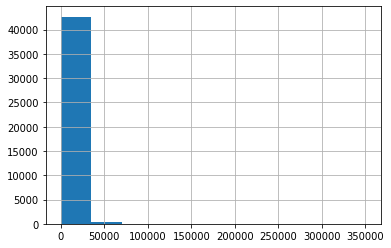

In [14]:
geo_data_br['price'].hist()

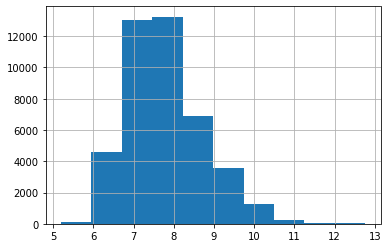

In [15]:
np.log(geo_data_br['price']).hist()

In [16]:
geo_data_br['operation'].value_counts()

rent    46030
Name: operation, dtype: int64

## Preliminary Mapping

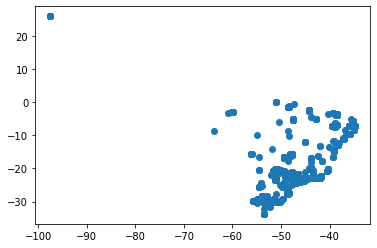

In [17]:
#Plotting Geo-Spatial data for Brazil dataset.
plt.scatter(geo_data_br['lon'], geo_data_br['lat']);

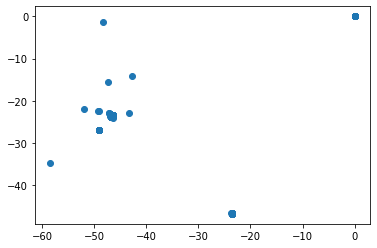

In [18]:
#Plotting Geo-Spatial data for Sao Paulo dataset.
plt.scatter(geo_data_sp['Longitude'], geo_data_sp['Latitude']);

> The preliminary scatter plots allows us to see the relationship between the locations of each real estate data listing. However, it is difficult to see the full picture. Using CartoPy we can plot these points onto a map.

### Map of Brazil Data with CartoPy

/Users/matteocangiano/opt/anaconda3/lib/python3.7/site-packages/cartopy/io/img_tiles.py:320: UserWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  "The StamenTerrain class was deprecated in v0.17. "


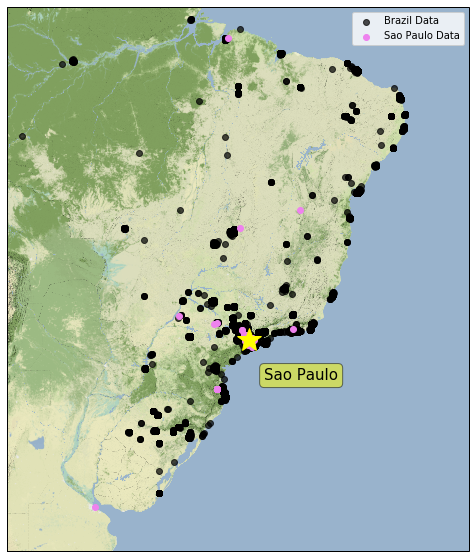

In [20]:
    # Create a Stamen Terrain instance.
stamen_terrain = cimgt.StamenTerrain()
fig = plt.figure(figsize=(10, 10))


    # Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)
#ax.add_feature(cfeature.STATES.with_scale('10m'))
#ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

    # Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-65, -30, 1, -36])

    # Add the Stamen data at zoom level 12.
ax.add_image(stamen_terrain, 7)


    # Add a marker.
plt.plot(-46.6333, -23.5505, marker='*', color='yellow', markersize=25,
             alpha= 1, transform=ccrs.Geodetic())


    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text.
plt.text(-38, -26, u'Sao Paulo',
             verticalalignment='center', horizontalalignment='right',
             transform=text_transform,
         fontdict={'size': 15},
             bbox=dict(facecolor='yellow', alpha=0.5, boxstyle='round'))
# Brazil Data
plt.scatter(geo_data_br['lon'], geo_data_br['lat'],
         color='black', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 0.7,
         label= 'Brazil Data'
         )

# Sao Paulo Data
plt.scatter(geo_data_sp['Longitude'], geo_data_sp['Latitude'],
         color='violet', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 1,
         label= 'Sao Paulo Data'
         )

plt.legend()
plt.show()


#https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

### Filter Brazil Data for Sao Paulo Listings

In [22]:
mask = geo_data_br.applymap(lambda x: '|São Paulo|' in str(x))
geo_data_br_sp = geo_data_br[mask.any(axis=1)]

# Shape of filtered dataset
geo_data_br_sp.shape

(38636, 25)

/Users/matteocangiano/opt/anaconda3/lib/python3.7/site-packages/cartopy/io/img_tiles.py:320: UserWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  "The StamenTerrain class was deprecated in v0.17. "


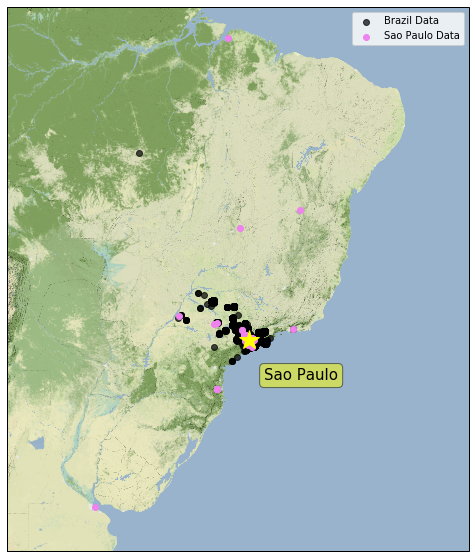

In [23]:
    # Create a Stamen Terrain instance.
stamen_terrain = cimgt.StamenTerrain()
fig = plt.figure(figsize=(10, 10))


    # Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)
#ax.add_feature(cfeature.STATES.with_scale('10m'))
#ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

    # Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-65, -30, 1, -36])

    # Add the Stamen data at zoom level 12.
ax.add_image(stamen_terrain, 7)


    # Add a marker.
plt.plot(-46.6333, -23.5505, marker='*', color='yellow', markersize=20,
             alpha=1, transform=ccrs.Geodetic())


    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text.
plt.text(-38, -26, u'Sao Paulo',
             verticalalignment='center', horizontalalignment='right',
             transform=text_transform,
         fontdict={'size': 15},
             bbox=dict(facecolor='yellow', alpha=0.5, boxstyle='round'))

# Brazil Data
plt.scatter(geo_data_br_sp['lon'], geo_data_br_sp['lat'],
         color='black', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 0.7,
         label= 'Brazil Data'
         )


# Sao Paulo Data
plt.scatter(geo_data_sp['Longitude'], geo_data_sp['Latitude'],
         color='violet', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 1,
         label= 'Sao Paulo Data'
         )

plt.legend()
plt.show()


#https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

> The maps show us where the listings lie within the country of Brazil. Due to the concentration of listings around the city of Sao Paolo we decided to perform a case study on the city itself. The outliers seen in the maps do not concern us due to a radius that will be set later in the geoprocessing phase that will only consider listings within it. 

### Mapping Listings in Sao Paolo (Zoomed to City View)

/Users/matteocangiano/opt/anaconda3/lib/python3.7/site-packages/cartopy/io/img_tiles.py:320: UserWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  "The StamenTerrain class was deprecated in v0.17. "


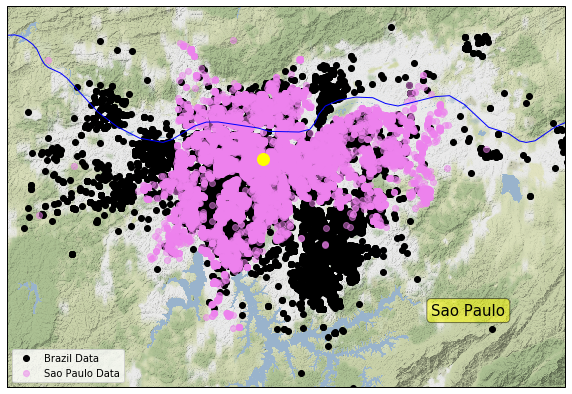

In [25]:
    # Create a Stamen Terrain instance.
stamen_terrain = cimgt.StamenTerrain()
fig = plt.figure(figsize=(10, 10))


    # Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)
#ax.add_feature(cfeature.STATES.with_scale('10m'))
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

    # Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-47, -46.2, -23.85, -23.35])

    # Add the Stamen data at zoom level 12.
ax.add_image(stamen_terrain, 12)


    # Add a marker.
plt.plot(-46.6333, -23.5505, marker='o', color='yellow', markersize=12,
             alpha=1, transform=ccrs.Geodetic())


    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text.
plt.text(-46.25, -23.75, u'Sao Paulo',
             verticalalignment='center', horizontalalignment='right',
             transform=text_transform,
         fontdict={'size': 15},
             bbox=dict(facecolor='yellow', alpha=0.5, boxstyle='round'))

# Brazil Data
plt.scatter(geo_data_br_sp['lon'], geo_data_br_sp['lat'],
         color='black', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 1,
         label= 'Brazil Data'
         )


# Sao Paulo Data
plt.scatter(geo_data_sp['Longitude'], geo_data_sp['Latitude'],
         color='violet', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 0.5,
         label= 'Sao Paulo Data'
         )

plt.legend()
plt.show()


#Adapted from: https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

> The map shows us that the combination of the two datasets allow us to have more data covering the whole city. To see the realtionship between these listings and pre-existing favelas we perform a case study around the well known favela, Parasaipolis. 

### Case Study Parasaipolis

#### Creating a Grid around Parasaipolis

In [64]:
BBox = [-46.7483, -46.7054,      
         -23.5936, -23.6355]

#### Loading Background for Map

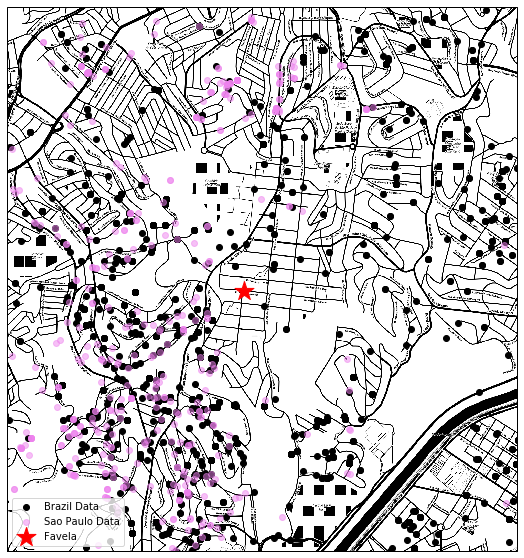

In [65]:
    # Create a Stamen Terrain instance.
stamen_terrain = cimgt.Stamen(style='Toner')
fig = plt.figure(figsize=(10, 10))


    # Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)
#ax.add_feature(cfeature.STATES.with_scale('10m'))
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

    # Limit the extent of the map to a small longitude/latitude range.
ax.set_extent(BBox)

    # Add the Stamen data at zoom level 16.
ax.add_image(stamen_terrain, 16)


    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)


# Brazil Data
plt.scatter(geo_data_br_sp['lon'], geo_data_br_sp['lat'],
         color='black', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 1,
         label= 'Brazil Data'
         )

# Sao Paulo Data
plt.scatter(geo_data_sp['Longitude'], geo_data_sp['Latitude'],
         color='violet', marker='o',
         transform=ccrs.Geodetic(),
         alpha = 0.5,
         label= 'Sao Paulo Data'
         )

# Favela Marker
plt.scatter(-46.728400,-23.615466, marker = '*', color = 'r',
           transform=ccrs.Geodetic(), s= 400, label='Favela')


plt.legend(loc='lower left')
plt.show()


#Adapted from: https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html

## Preparing Data for Geoprocessing

#### Columns found in both DataFrames.

In [83]:
list(geo_data_br_sp.columns)[0:3] #Shortened for visual purposes

['created_on', 'operation', 'property_type']

In [82]:
list(geo_data_sp.columns)[0:3] # Shortened for visual purposes 

['price', 'Condo', 'Size']

In [69]:
# Renaming the columns so both DataFrames match.
geo_data_sp.rename(inplace = True, columns= {
                                    'Negotiation Type' : 'operation',
                                    'Property Type' : 'property_type',
                                    'Latitude' : 'lat',
                                    'Longitude' : 'lon',
                                    'Price' : 'price'
});

In [70]:
# Selecting only the columns we will be using for geoprocessing.
data_sp_concat = geo_data_sp[['operation', 'property_type', 'lat', 'lon', 'price']]

In [71]:
# Selecting only the columns we will be using for geoprocessing.
data_brazil_concat = geo_data_br_sp[['operation', 'property_type', 'lat', 'lon', 'price']]

In [77]:
# Selecting listings with a price to maintain the complete 
data_brazil_concat = data_brazil_concat[data_brazil_concat['price'].isnull() == 0]

In [86]:
set(data_brazil_concat.columns) == set(data_sp_concat.columns)

True

In [90]:
# Checking null values
data_sp_concat.isnull().sum().sum()

0

In [89]:
# Checking null values
data_brazil_concat.isnull().sum().sum()

0

In [87]:
data_sp_concat.head(3)

,operation,property_type,lat,lon,price
0,rent,apartment,-23.543138,-46.479486,930
1,rent,apartment,-23.550239,-46.480718,1000
2,rent,apartment,-23.542818,-46.485665,1000


In [88]:
data_brazil_concat.head(3)

,operation,property_type,lat,lon,price
154,rent,apartment,-23.624269,-46.729195,2300.0
156,rent,apartment,-23.616831,-46.732323,11500.0
157,rent,apartment,-23.627695,-46.733921,5000.0


#### Exporting Data for Geoprocessing

In [ ]:
#data_sp_concat.to_csv('data_sp_concat.csv', index = False)
#data_brazil_concat.to_csv('data_brazil_concat.csv', index = False)

## Geoprocessing 

[Insert Link for Geoprocessing Notebook]()
> Due to the length of the geoprocessing phase of the project, all geoprocessing was done in its own notebook.

## Feature Engineering

### Loading Geoprocessed Data

In [146]:
df = pd.read_csv('https://general-assembly-project-5.s3.amazonaws.com/sp_master.csv')

### Creating Interaction Terms

In [147]:
# Converting Area to km^2
df['geog_orig_area'] = df['geog_orig_area']/1_000_000
df['total_listing_count'] = df['sao_paulo_apartment_count_listings'] + df['brazil_apartment_count_listings'] + df['brazil_house_count_listings'] + df['brazil_ph_count_listings'] + df['brazil_store_count_listings']

#Creating an interaction term that shows number of listings for every 100 people in shapefile.
df['listing/pop'] = (df['total_listing_count'] / df['population_estimate']) * 100

#Creating an interaction term that shows number of listings for every 100 meters in shapefile.
df['listing/area'] = (df['total_listing_count'] / (df['geog_orig_area'])) * 100

In [150]:
# Showing the mean of each interaction term by class.
df_mean_interaction = df.groupby(by='favela_present').mean()[['listing/pop','listing/area']]
df_mean_interaction.rename(columns= {'listing/pop': 'mean_listing/pop',
                                     'listing/area': 'mean_listing/area'})
df_mean_interaction

,listing/pop,listing/area
favela_present,,
0.0,0.434390,5929.106973
1.0,0.068592,898.062071


> We decided to create interaction terms for the ratio between number of listings and population estimates for each geographic shape, as well as the ratio between total listings and the size of the area for each geographic shape. We assume that these interaction terms will help our model predict whether or not a favela is present in the shapefile due to descriptive statistics shown above where there is a notable difference in the mean values for each class. 

### Exporting Final Dataset for Modeling

In [ ]:
# df.to_csv('../datasets/final_dataset.csv', index= False)